In this example we reduce the data for a delay scan using the time tool, stack two runs, load the stacked data, separate the isotropic and anisotropic components, and plot them. 

# inputs

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import h5py
import sys
import os
import time
import scipy
import scipy.io as scio
from scipy.optimize import curve_fit


from LCLSDataToolsNew.GeneralTools import *
from LCLSDataToolsNew.filterTools import *
from LCLSDataToolsNew.diffSignalTools import *
from LCLSDataToolsNew.binningToolsErr import *
from LCLSDataToolsNew.anisotropyToolsAll import *
from LCLSDataToolsNew.SVDTools import *
from LCLSDataToolsNew.SetUpFns import *
from LCLSDataToolsNew.DiffBinFns import *
from LCLSDataToolsNew.ReduceFns import *
from LCLSDataToolsNew.StackFns import *
from LCLSDataToolsNew.IRFtools import *
from LCLSDataToolsNew.plottingTools import *

print('Import Complete!')

exper = 'xcsl1008621'

### s3df ###
smalldata_folder='/sdf/data/lcls/ds/xcs/'+exper+'/hdf5/smalldata/'

## set output path as desired
outpath='/sdf/data/lcls/ds/xcs/'+exper+'/results/ReducedData/'

#### make directories if needed  #####
# if os.path.isdir(outpath+'/figures/')==False:
#     os.makedirs(outpath+'/figures/')
# if os.path.isdir(outpath+'/npy/')==False:
#     os.makedirs(outpath+'/npy/')


Import Complete!


## set up varDict

In [2]:
varDict = {
        'ipm4'          : 'ipm4/sum',
        'ipm5'          : 'ipm5/sum',
        'xray_status'   : 'lightStatus/xray',
        'laser_status'  : 'lightStatus/laser',
        'ebeam_hv'      : 'ebeam/photon_energy',
        'scan_vec'      : 'scan/var0',
        'laser_diode'   : '/diodeGon/channels/',
    
        ## tt variables
        'ttCorr'        : 'tt/ttCorr',
        'ttAMPL'        : 'tt/AMPL',
        'ttFWHM'        : 'tt/FLTPOSFWHM',
        'ttFLTPOS'      : 'tt/FLTPOS',
        'encoder'       : 'enc/lasDelay',
        'lxt'           : 'epics/lxt' , 

        
        ## scattering variables
        'azav'      : 'epix10k2M/azav_azav',
        'qs'        : 'UserDataCfg/epix10k2M/azav__azav_q',
        'phis'      :  'UserDataCfg/epix10k2M/azav__azav_phiVec',


        }

## set up paramDict

In [3]:
setbins=np.arange(-0.5e-12,2e-12,.05e-12)


paramDict= {
        'binSetup'  : 'fixed',
        'binSet2'   : setbins,
        'binMethod' : 'ave', 
        'qnorm'     : (0.5,3.5), 
        'qrange'    : (0.5,3.5),
    
        'show_filters'  : True, #show filter plots
        'useAzav_std'  : False, 
        'azav_percent_filter' : None, 

        'ipm'    : 5, # select ipm to use for I0
    
        'corr_filter' : True,
        'corr_threshold': .05 , #threshold as fraction
        'slope_filter': False, 
        'slope_param': (10/1e4,0), #slope,intercept
    
        'ipm_filter' : (500,None), #set limits for ipm intensity
        'Iscat_threshold'  : 500, #lower limit for Iscat
    
        'use_TT'   :  True,  
        'scan_var' : None,
        'x_var'   : None,
    
        't0_corr' : None,  #false or float offset for time zero
        'enforce_iso': False, #enforce isotropic off shots?
        'energy_corr' : True, # ebeam photon energy correction
        'NonLin_corr': 'SVD', #None, SVD, poly, or SVDbyBin
        
        'AdjSub'    : 50, #number of adjascent off shots to average and subtract, -1 subtracts all
        'aniso'  : False,
        'shift_deg' :0,
        'xstat' : True,
    
        'BackSub': None,
        'earlytrange':(-0.5e-12,0e-12),
    
        'showSVD': False, #do svd
        'SVD_n': 4, # number of svd components
        'slice_plot':None, #how to slice up plots displayed at end
        'smooth':None, #smoothinng before svd?
        
        'overwrite' : True, # overwrite files? 
        'save_mat'  : False,
        'save_h5' : False,
    }

# Run Reduction

loading  /sdf/data/lcls/ds/xcs/xcsl1008621/hdf5/smalldata/xcsl1008621_Run0086.h5
basename is  xcsl1008621_Run0086
key not found scan_vec
scan variable is  newdelay
finished loading h5
calculated Iscat
setupFilters - done!
making correlation filter
correlation equation = 3.873767e-02 x +2.661006e+02
slope std 0.0002400694552549888
intercept std 7.752051509684088
fraction of data kept 1.000000e+00
hit right edge on TTamp
TTAMP: fraction_kept  0.9995917811947204  lower  0.0051376505982870194  upper  0.2925060280171033
TTFWHM: fraction_kept  0.9908675799086758  lower  73.30354932640026  upper  140.3439419625692
TTPOS: fraction_kept  0.9908831133487549  lower  211.01882459329937  upper  635.1154573567627
1.0602991580963135  seconds
saved reduction.png
t=(encoder + tt/ttCorr)*1e-12
x-ray off subtraction done!
normalize data
(459,) (12209, 11, 459)


/sdf/home/s/slraj/code/ScatteringCode/ReduceScatt-main/LCLSDataToolsNew/DiffBinFns.py:108: RuntimeWarning: Mean of empty slice
  darkMean = np.nanmean(dark,0)
/sdf/home/s/slraj/code/ScatteringCode/ReduceScatt-main/LCLSDataToolsNew/DiffBinFns.py:152: RuntimeWarning: Mean of empty slice
  cake=np.nanmean(divAny(cspad_azav[early_x,:,:],normal_factor[early_x,:]),0) #normalize by norm
/sdf/home/s/slraj/code/ScatteringCode/ReduceScatt-main/LCLSDataToolsNew/DiffBinFns.py:158: RuntimeWarning: Mean of empty slice
  outDict['loff_cake']=np.nanmean(cspad_azav[early_x,:,:],0)


normalize data done!
normalization applied
applying energy correction
do SVD nonlinear corrections
nonlinear correction - done!
starting difference signal
Difference Signal Done!
3.9949214458465576  seconds
Starting binning
bin by given bins
dict_keys(['xcenter', 'xmean', 'xstd', 'bincount', 'binmean', 'binstd'])
binning - done!
4.229409217834473  seconds
saved output to /sdf/data/lcls/ds/xcs/xcsl1008621/results/ReducedData/npy/xcsl1008621_Run0086_out.npy
7097/12209 events used
plotting azavs
logscan False
(49, 459)
(459,)
done
4.735620975494385  seconds
loading  /sdf/data/lcls/ds/xcs/xcsl1008621/hdf5/smalldata/xcsl1008621_Run0087.h5
basename is  xcsl1008621_Run0087
key not found scan_vec
scan variable is  newdelay
finished loading h5
calculated Iscat
setupFilters - done!
making correlation filter
correlation equation = 3.880463e-02 x +2.637168e+02
slope std 0.00026313405479673333
intercept std 9.59528608689475
fraction of data kept 1.000000e+00
hit right edge on TTamp
TTAMP: fraction_

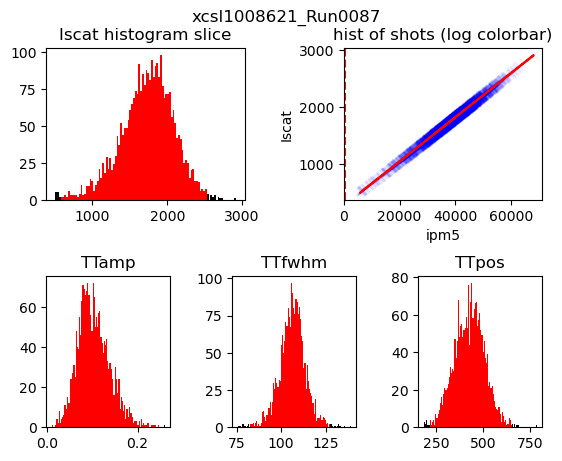

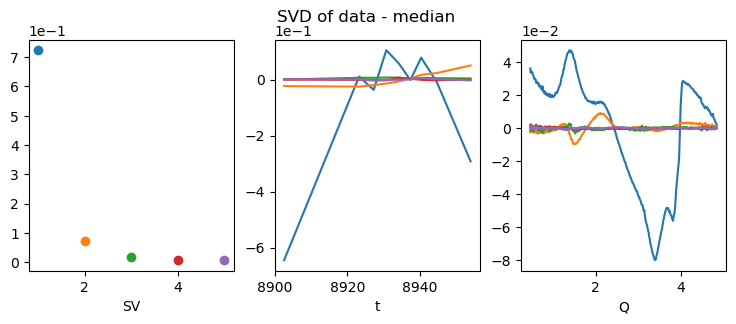

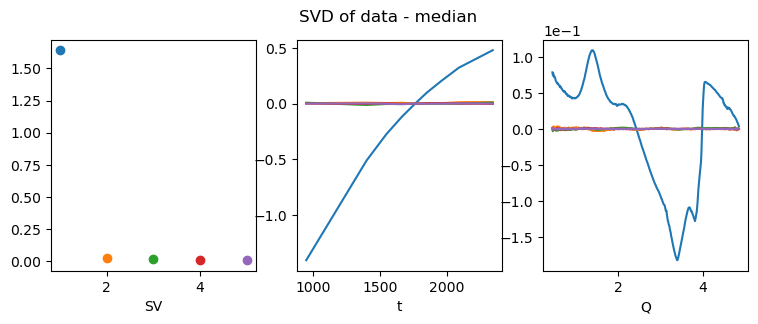

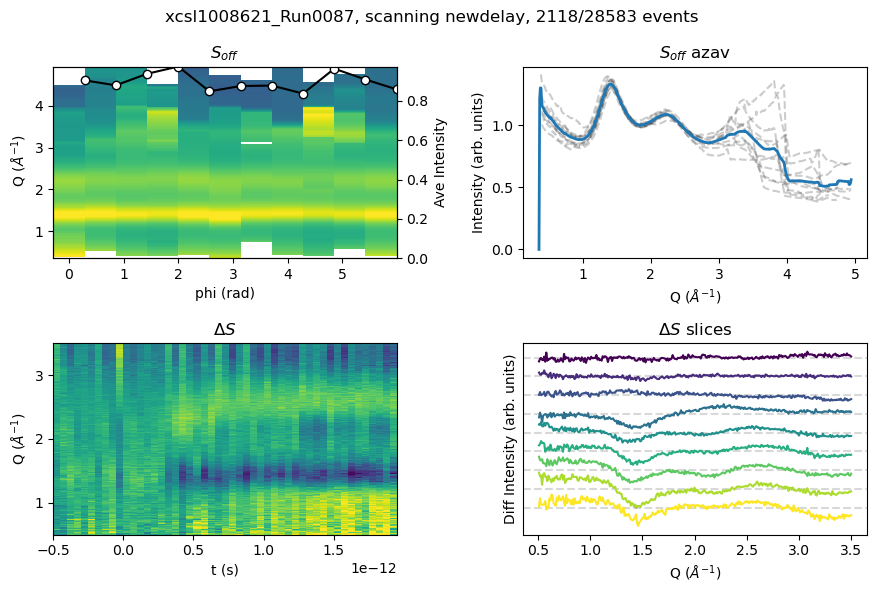

In [4]:
# runs=[133, 134, 135]
runs=[86,87]


ReduceData(smalldata_folder,exper,runs,outpath,paramDict,varDict)
    

# Stack Runs 

In [5]:
runpath=outpath+'npy/'
runs2=[86,87]

# stackDict, estat=Stack_eData(runpath,exper,runs2,earlyt=(-0.2e-12,0.1e-12))
# eData_plot(runs2,estat)


stackDict=StackProccessed(runpath,exper,runs2)

In [6]:
#load variables from stack

print(stackDict.keys())
diff=stackDict['aveData']
ts=stackDict['ts']
qs=stackDict['qs']
phis=stackDict['phis']


dict_keys(['aveData', 'errData', 'ts', 'qs', 'phis', 'runs', 'method'])


In [7]:
#do anisotropy

S0,S0_err,S2,S2_err=S0S2P(diff,phis,shift_n=0,deg=100)

shift is 100 degrees
49


Text(0.5, 0.98, '$\\Delta$S2')

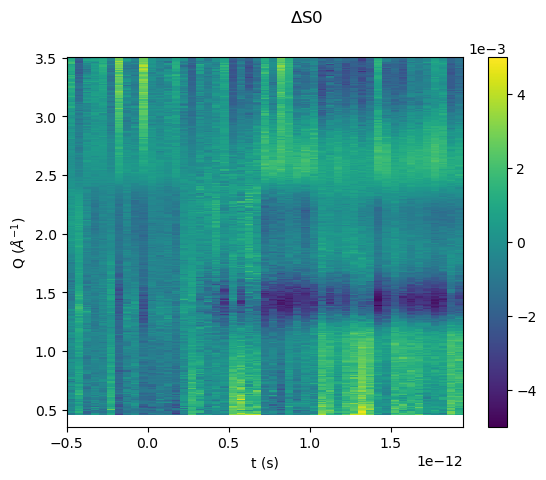

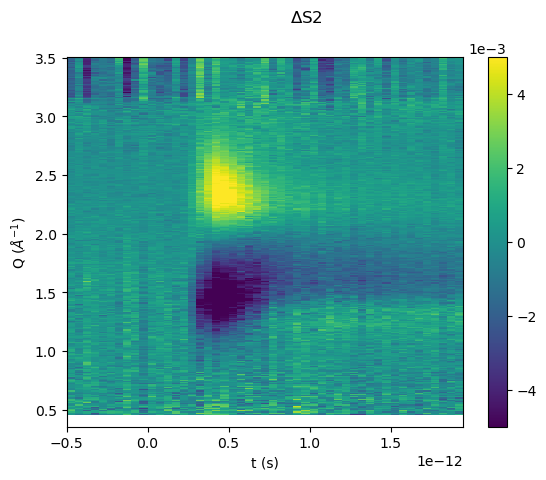

In [8]:
#plot

goodq,qrange=chooseR(0.3,3.5,qs)
goodt,trange=chooseR(-0.5e-12,2e-12,ts)


plot_2d(ts[goodt],qs[goodq],S0[goodt,:][:,goodq])
plt.clim(-.5e-2,.5e-2)
plt.suptitle('$\Delta$S0')

plt.savefig('dS0.svg',format='svg')

plot_2d(ts[goodt],qs[goodq],S2[goodt,:][:,goodq])
plt.clim(-.5e-2,.5e-2)
plt.suptitle('$\Delta$S2')